In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_excel('expert1.xlsx')
df2 = pd.read_excel('expert2.xlsx')
df3 = pd.read_excel('expert3.xlsx')

In [3]:
scale_a = {
    "VP" : (0,0,0.1,0.2),
    "P" : (0.1,0.2,0.2,0.3),
    "MP" : (0.2,0.3,0.4,0.5),
    "M" : (0.4,0.5,0.5,0.6),
    "MG" : (0.5,0.6,0.7,0.8),
    "G" : (0.7,0.8,0.8,0.9),
    "VG" : (0.8,0.8,1,1)
}

scale_b = {
    "VL" : (0,0,1),
    "L" : (0,0.1,0.3),
    "ML" : (0.1,0.3,0.5),
    "M": (0.3, 0.5, 0.7),
    "MH" : (0.5,0.7,0.9),
    "H" : (0.7,0.9,1),
    "VH" : (0.9,1,1)
}
 
arr1 = np.array(df1)
arr2 = np.array(df2)
arr3 = np.array(df3)


In [4]:
def cat_to_num_a(lis):
    for i in range(len(lis)):
        if lis[i] in scale_a:
            lis[i] = scale_a[lis[i]]
    return lis

def cat_to_num_b(lis):
    for i in range(len(lis)):
        if lis[i] in scale_b:
            lis[i] = scale_b[lis[i]]
    return lis

In [5]:
arr1 = arr1[2:,1: ]
arr2 = arr2[2:,1: ]
arr3 = arr3[2:,1: ]
for j in range(3):
    arr1[:,2*j] = cat_to_num_a(arr1[:,2*j])
    arr2[:,2*j] = cat_to_num_a(arr2[:,2*j])
    arr3[:,2*j] = cat_to_num_a(arr3[:,2*j])
for j in range(3):
    arr1[:,2*j+1] = cat_to_num_b(arr1[:,2*j+1])
    arr2[:,2*j+1] = cat_to_num_b(arr2[:,2*j+1])
    arr3[:,2*j+1] = cat_to_num_b(arr3[:,2*j+1])


In [6]:
arr1.shape

(46, 6)

In [7]:
arr1_np = np.zeros((arr1.shape[0], 21))
for i in range(arr1.shape[0]):
    vals = []
    for e in arr1[i]:
        for v in e:
            vals.append(v)
    arr1_np[i, :] = np.array(vals)

arr2_np = np.zeros((arr2.shape[0], 21))
for i in range(arr2.shape[0]):
    vals = []
    for e in arr2[i]:
        for v in e:
            vals.append(v)
    arr2_np[i, :] = np.array(vals)

arr3_np = np.zeros((arr3.shape[0], 21))
for i in range(arr3.shape[0]):
    vals = []
    for e in arr3[i]:
        for v in e:
            vals.append(v)
    arr3_np[i, :] = np.array(vals)


In [8]:
arr1_np

array([[0.8, 0.8, 1. , 1. , 0.9, 1. , 1. , 0.7, 0.8, 0.8, 0.9, 0.7, 0.9,
        1. , 0.8, 0.8, 1. , 1. , 0.9, 1. , 1. ],
       [0.2, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.6, 0.3, 0.5,
        0.7, 0.5, 0.6, 0.7, 0.8, 0.5, 0.7, 0.9],
       [0.2, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.6, 0.3, 0.5,
        0.7, 0.5, 0.6, 0.7, 0.8, 0.5, 0.7, 0.9],
       [0.2, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.6, 0.3, 0.5,
        0.7, 0.5, 0.6, 0.7, 0.8, 0.5, 0.7, 0.9],
       [0.2, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.6, 0.3, 0.5,
        0.7, 0.5, 0.6, 0.7, 0.8, 0.5, 0.7, 0.9],
       [0.8, 0.8, 1. , 1. , 0.9, 1. , 1. , 0.7, 0.8, 0.8, 0.9, 0.7, 0.9,
        1. , 0.8, 0.8, 1. , 1. , 0.9, 1. , 1. ],
       [0.8, 0.8, 1. , 1. , 0.9, 1. , 1. , 0.7, 0.8, 0.8, 0.9, 0.7, 0.9,
        1. , 0.8, 0.8, 1. , 1. , 0.9, 1. , 1. ],
       [0.2, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.4, 0.5, 0.5, 0.6, 0.3, 0.5,
        0.7, 0.5, 0.6, 0.7, 0.8, 0.5, 0.7, 0.9],
       [0.8, 0.8, 1. , 1

In [9]:
arr = arr1_np
for j in range(3):
    arr[:,7*j] = np.min(np.stack([arr1_np[:,7*j], arr2_np[:,7*j],arr3_np[:,7*j]]),axis=0 )
    arr[:,7*j+1]=np.mean(np.stack([arr1_np[:,7*j+1], arr2_np[:,7*j+1],arr3_np[:,7*j+1]]),axis=0 )
    arr[:,7*j+2] = np.mean(np.stack([arr1_np[:,7*j+2], arr2_np[:,7*j+2],arr3_np[:,7*j+2]]),axis=0 )
    arr[:,7*j+3] = np.max(np.stack([arr1_np[:,7*j+3], arr2_np[:,7*j+3],arr3_np[:,7*j+3]]),axis=0)
    arr[:,7*j+4]=np.min(np.stack([arr1_np[:,7*j+4], arr2_np[:,7*j+4],arr3_np[:,7*j+4]]),axis=0)
    arr[:,7*j+5]=np.mean(np.stack([arr1_np[:,7*j+5], arr2_np[:,7*j+5],arr3_np[:,7*j+5]]),axis=0 )
    arr[:,7*j+6]=np.max(np.stack([arr1_np[:,7*j+6], arr2_np[:,7*j+6],arr3_np[:,7*j+6]]),axis=0)

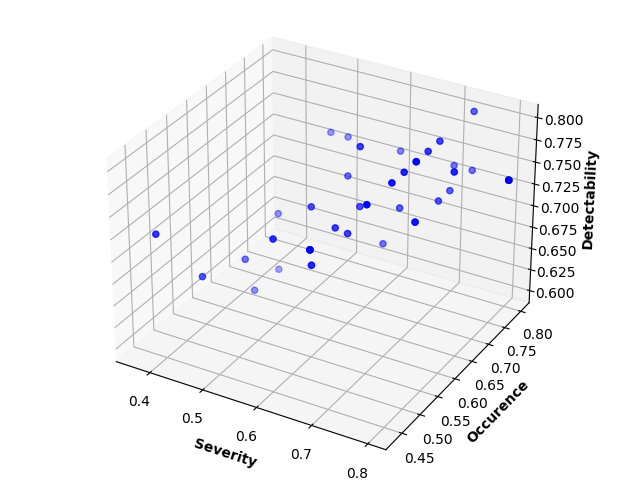

In [10]:
# creating 3d plot using matplotlib
# in python
 
# for creating a responsive plot
%matplotlib widget
 
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 

 
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
 
# creating the plot
#plot_geeks = ax.scatter(arr[:,1], arr[:,8], arr[:,15])
ax.scatter3D(arr[:,1],arr[:,8],arr[:,15],  color = "blue")

 
# setting title and labels
plt.title("Failure modes")
ax.set_xlabel('Severity', fontweight ='bold')
ax.set_ylabel('Occurence', fontweight ='bold')
ax.set_zlabel('Detectability', fontweight ='bold')
 

 
# show plot
plt.show()

In [11]:
import clusteringZ as cZ
Zkc = cZ.clusteringZ(3)
clusters3, labels3 = Zkc.Fit(arr)
for i in range(3):
    print(clusters3[i].shape)

(7, 21)
(21, 21)
(18, 21)


In [12]:
from sklearn.metrics import silhouette_score
print(silhouette_score(arr, labels3))

0.32144272528110035


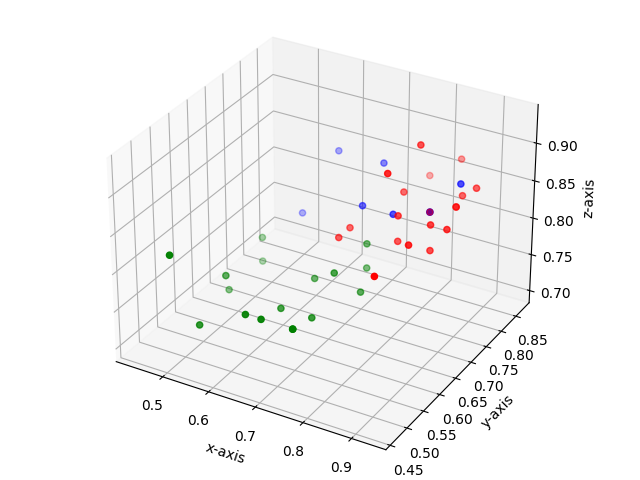

In [13]:
# creating 3d plot using matplotlib
# in python
 
# for creating a responsive plot
%matplotlib widget
 
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 

 
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
 
# creating the plot
#plot_geeks = ax.scatter(arr[:,1], arr[:,8], arr[:,15])

ax.scatter3D(clusters3[0][:, 2],clusters3[0][:, 9],clusters3[0][:, 16],  color = "blue")
ax.scatter3D(clusters3[1][:, 2],clusters3[1][:, 9],clusters3[1][:, 16],  color = "red")
ax.scatter3D(clusters3[2][:, 2],clusters3[2][:, 9],clusters3[2][:, 16],  color = "green")
# ax.scatter3D(clusters3[3][:, 2],clusters3[3][:, 9],clusters3[3][:, 16],  color = "yellow")
# ax.scatter3D(clusters3[4][:, 2],clusters3[4][:, 9],clusters3[4][:, 16],  color = "black")
# ax.scatter3D(clusters3[5][:, 2],clusters3[5][:, 9],clusters3[5][:, 16],  color = "violet")
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
 
# displaying the plot
plt.show()